In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import copy
import os
warnings.filterwarnings("ignore")
#设置jupyter显示多行结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
# #显示所有列
pd.set_option('display.max_columns', None) #原来中间会有部分列的显示被省略
# #显示所有行
# pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

# # 解决中文问题
# plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号显示问题
plt.rcParams['axes.unicode_minus'] = False 

# DGM数据

In [2]:
D = [[-45,-5],[-45,-15],[-45,-25],[-55,-35],[-65,-35],[-75,-35],[-85,-35],[-95,-35],[-95,-25],[-95,-15],[-95,-5],
    [-95,5],[-95,15],[-95,25],[-95,35],[-85,35],[-75,35],[-65,35],[-55,35],[-45,25],[-45,15],[-45,5]]

G = [[5,-5],[15,-5],[25,-5],[25,-15],[25,-25],[15,-35],[5,-35],[-5,-35],[-15,-35],[-25,-25],[-25,-15],[-25,-5],
    [-25,5],[-25,15],[-25,25],[-15,35],[-5,35],[5,35],[15,35],[25,25]]

M = [[45,-5],[45,-15],[45,-25],[45,-35],[45,5],[45,15],[45,25],[45,35],[55,25],[65,15],
    [75,15],[85,25],[95,35],[95,25],[95,15],[95,5],[95,-5],[95,-15],[95,-25],[95,-35]]

DGM = np.array(D+G+M)
DGM.shape

(62, 2)

<Figure size 432x216 with 0 Axes>

Text(0.5, 1.0, 'Center of Data Layout')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

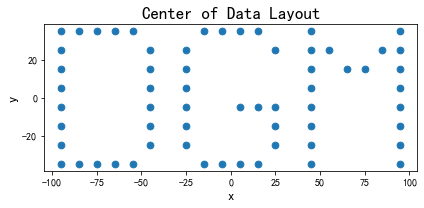

In [3]:
plt.figure(1,figsize=(6,3)) 

plt.scatter(DGM[:,0], DGM[:,1], s=45)

plt.title('Center of Data Layout', fontsize=17)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)

plt.tight_layout()
plt.show()

In [17]:
def gengerate_data(data_num,data_center):
    normal_mean = [0,0]
    normal_cov = [[1,0],[0,1]]
    normal_data = np.random.multivariate_normal(normal_mean,normal_cov,1000)
    all_data = []
    for [i,j] in data_center:
        tmp_data = copy.deepcopy(normal_data)
        tmp_data += [i,j]
        all_data.append(tmp_data)
    all_data = np.array(all_data).reshape(-1,2)
    np.random.seed(2022)
    np.random.shuffle(all_data)
    
    return all_data[:30000]

In [18]:
all_data = gengerate_data(data_num=30000,data_center=DGM)
np.savetxt("train.txt",all_data[:10000])
np.savetxt("valid.txt",all_data[10000:20000])
np.savetxt("test.txt",all_data[20000:30000])

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Data Layout')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

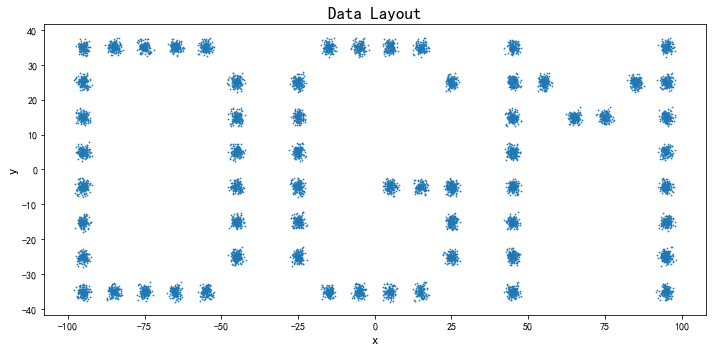

In [6]:
plt.figure(1,figsize=(10,5)) 

plt.scatter(all_data[:10000,0], all_data[:10000,1], s=0.5)

plt.title('Data Layout', fontsize=17)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)

plt.tight_layout()
plt.show()

## 圆形数据

生成两份数据：
+ cirlce_1 : 一个环 半径70（28等份）
+ circle_2 : 2个环 半径25（8等份）+ 半径50（20等份）

In [7]:
def generate_circle(r, a):
    #r 半径
    #a 等份

    centers = []
    for n in range(1,a+1):
        x = r*np.cos(2*np.pi*(n-1)/a)
        y = r*np.sin(2*np.pi*(n-1)/a)
        centers.append([x,y])
        
    return centers

In [8]:
 def draw_centers_layout(data_name, data_center):
    plt.figure(1,figsize=(6,6)) 

    plt.scatter(data_center[:,0], data_center[:,1], s=45)

    plt.title('Center of Data Layout', fontsize=17)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tight_layout()
    plt.savefig("./" + data_name + "/center_layout.jpg", dpi=300, bbox_inches='tight')
    plt.show()

In [9]:
def gengerate_data(data_num, data_center):
    normal_mean = [0,0]
    normal_cov = [[1,0],[0,1]]
    normal_data = np.random.multivariate_normal(normal_mean,normal_cov,2000)
    all_data = []
    for [i,j] in data_center:
        tmp_data = copy.deepcopy(normal_data)
        tmp_data += [i,j]
        all_data.append(tmp_data)
    all_data = np.array(all_data).reshape(-1,2)
    np.random.seed(2022)
    np.random.shuffle(all_data)
    
    return all_data[:30000]

In [10]:
def draw_data_layout(data_name, all_data):
    plt.figure(1,figsize=(6,6)) 

    plt.scatter(all_data[:10000,0], all_data[:10000,1], s=1)

    plt.title('Data Layout', fontsize=17)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tight_layout()
    plt.savefig("./" + data_name + "/data_layout.jpg", dpi=300, bbox_inches='tight')
    plt.show()

(28, 2)

array([[ 7.00000000e+01,  0.00000000e+00],
       [ 6.82449539e+01,  1.55764654e+01],
       [ 6.30678208e+01,  3.03718617e+01],
       [ 5.47282038e+01,  4.36442861e+01],
       [ 4.36442861e+01,  5.47282038e+01],
       [ 3.03718617e+01,  6.30678208e+01],
       [ 1.55764654e+01,  6.82449539e+01],
       [ 4.28626380e-15,  7.00000000e+01],
       [-1.55764654e+01,  6.82449539e+01],
       [-3.03718617e+01,  6.30678208e+01],
       [-4.36442861e+01,  5.47282038e+01],
       [-5.47282038e+01,  4.36442861e+01],
       [-6.30678208e+01,  3.03718617e+01],
       [-6.82449539e+01,  1.55764654e+01],
       [-7.00000000e+01,  8.57252759e-15],
       [-6.82449539e+01, -1.55764654e+01],
       [-6.30678208e+01, -3.03718617e+01],
       [-5.47282038e+01, -4.36442861e+01],
       [-4.36442861e+01, -5.47282038e+01],
       [-3.03718617e+01, -6.30678208e+01],
       [-1.55764654e+01, -6.82449539e+01],
       [-1.28587914e-14, -7.00000000e+01],
       [ 1.55764654e+01, -6.82449539e+01],
       [ 3.

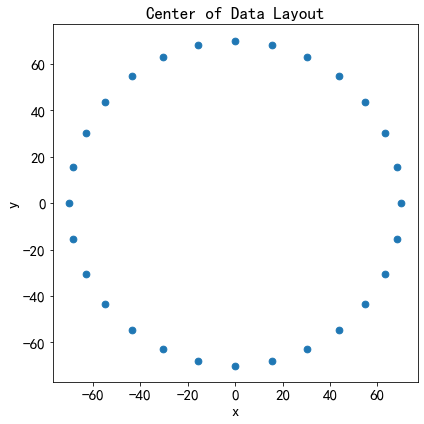

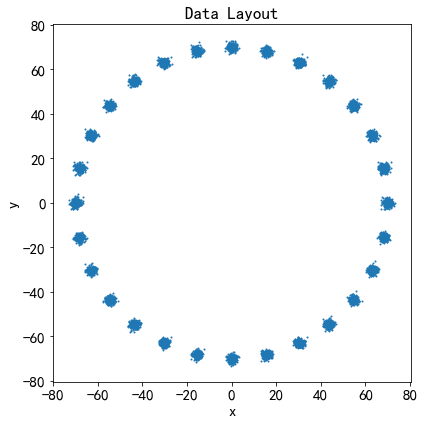

In [16]:
circle_1_center = generate_circle(70, 28)
circle_1_center = np.array(circle_1_center)
circle_1_center.shape
circle_1_center

os.makedirs("./circle_1/", exist_ok=True)
draw_centers_layout("circle_1", circle_1_center)
circle_1 = gengerate_data(data_num=30000,data_center=circle_1_center)
draw_data_layout("circle_1", circle_1)
np.savetxt("./circle_1/train.txt",circle_1[:10000])
np.savetxt("./circle_1/valid.txt",circle_1[10000:20000])
np.savetxt("./circle_1/test.txt",circle_1[20000:30000])

(28, 2)

array([[ 2.50000000e+01,  0.00000000e+00],
       [ 1.76776695e+01,  1.76776695e+01],
       [ 1.53080850e-15,  2.50000000e+01],
       [-1.76776695e+01,  1.76776695e+01],
       [-2.50000000e+01,  3.06161700e-15],
       [-1.76776695e+01, -1.76776695e+01],
       [-4.59242550e-15, -2.50000000e+01],
       [ 1.76776695e+01, -1.76776695e+01],
       [ 5.00000000e+01,  0.00000000e+00],
       [ 4.75528258e+01,  1.54508497e+01],
       [ 4.04508497e+01,  2.93892626e+01],
       [ 2.93892626e+01,  4.04508497e+01],
       [ 1.54508497e+01,  4.75528258e+01],
       [ 3.06161700e-15,  5.00000000e+01],
       [-1.54508497e+01,  4.75528258e+01],
       [-2.93892626e+01,  4.04508497e+01],
       [-4.04508497e+01,  2.93892626e+01],
       [-4.75528258e+01,  1.54508497e+01],
       [-5.00000000e+01,  6.12323400e-15],
       [-4.75528258e+01, -1.54508497e+01],
       [-4.04508497e+01, -2.93892626e+01],
       [-2.93892626e+01, -4.04508497e+01],
       [-1.54508497e+01, -4.75528258e+01],
       [-9.

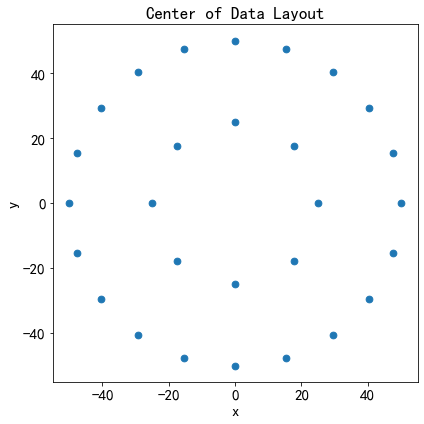

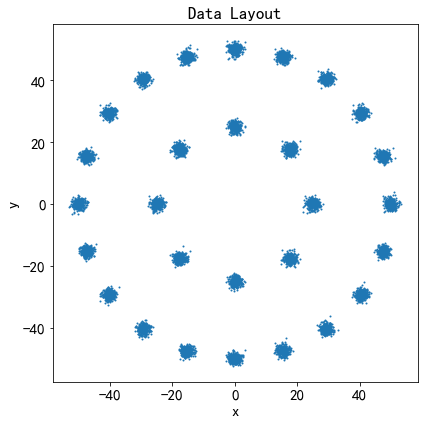

In [17]:
circle_2_center = generate_circle(25, 8) + generate_circle(50, 20)
circle_2_center = np.array(circle_2_center)
circle_2_center.shape
circle_2_center

os.makedirs("./circle_2/", exist_ok=True)
draw_centers_layout("circle_2", circle_2_center)
circle_2 = gengerate_data(data_num=30000,data_center=circle_2_center)
draw_data_layout("circle_2", circle_2)
np.savetxt("./circle_2/train.txt",circle_2[:10000])
np.savetxt("./circle_2/valid.txt",circle_2[10000:20000])
np.savetxt("./circle_2/test.txt",circle_2[20000:30000])